# Breast Cancer Prediction

## Attributes Info.
1. id - ID number

2. diagnosis - The diagnosis of breast tissues (M = malignant(Cancerous), B = benign(Non Cancerous))

3. radius_mean - Mean of distances from center to points on the perimeter

4. texture_mean - Standard deviation of gray-scale values

5. perimeter_mean - Mean size of the core tumor

6. area_mean

7. smoothness_mean - Mean of local variation in radius lengths

8. compactness_mean - Mean of perimeter^2 / area - 1.0

9. concavity_mean - Mean of severity of concave portions of the contour

8. concave points_mean - Mean for number of concave portions of the contour

10. symmetry_mean

11. fractal_dimension_mean - Mean for "coastline approximation" - 1

12. radius_se - Standard error for the mean of distances from center to points on the perimeter

13. texture_se - Standard error for standard deviation of gray-scale values

14. perimeter_se

15. area_se

16. smoothness_se - Standard error for local variation in radius lengths

17. compactness_se - Standard error for perimeter^2 / area - 1.0

18. concavity_se - Standard error for severity of concave portions of the contour

19. concave points_se - Standard error for number of concave portions of the contour

20. symmetry_se

21. fractal_dimension_se - Standard error for "coastline approximation" - 1

22. radius_worst - Worst or largest mean value for mean of distances from center to points on the perimeter

23. texture_worst - Worst or largest mean value for standard deviation of gray-scale values

24. perimeter_worst

25. area_worst

26. smoothness_worst - Worst or largest mean value for local variation in radius lengths

27. compactness_worst - Worst or largest mean value for perimeter^2 / area - 1.0

28. concavity_worst - Worst or largest mean value for severity of concave portions of the contour

29. concave points_worst - Worst or largest mean value for number of concave portions of the contour

30. symmetry_worst

31. fractal_dimension_worst - Worst or largest mean value for "coastline approximation" - 1

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [320]:
#from google.colab import files
#uploaded = files.upload()
data = pd.read_csv('breast-cancer-wisconsin.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [321]:
data.shape

(569, 33)

In [322]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [323]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [324]:
data = data.drop(['id', 'Unnamed: 32'], axis = 1)

In [325]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [326]:
data.shape

(569, 31)

In [327]:
df = pd.DataFrame(data)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [328]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [329]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

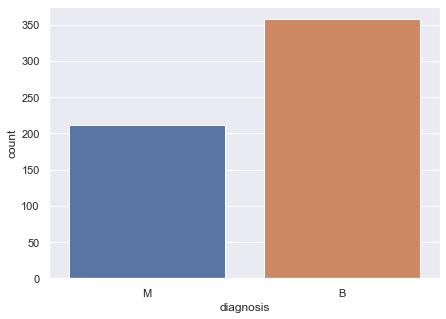

In [330]:
plt.figure(figsize = (7,5))
sns.set(style="darkgrid")
sns.countplot(df['diagnosis'], label = 'count')

In [331]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [332]:
df['diagnosis'].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [333]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

In [334]:
df['diagnosis'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

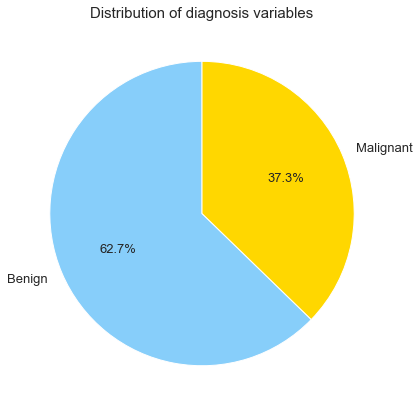

In [335]:
plt.figure(figsize = (10,7))
labels= ['Benign', 'Malignant']
colors= ['lightskyblue', 'gold']
values = df['diagnosis'].value_counts()
plt.pie(values, colors= colors, labels= labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 13})
plt.title('Distribution of diagnosis variables', fontsize = 15)
plt.show()

In [336]:
df.describe(include = 'all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\masud\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\masud\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


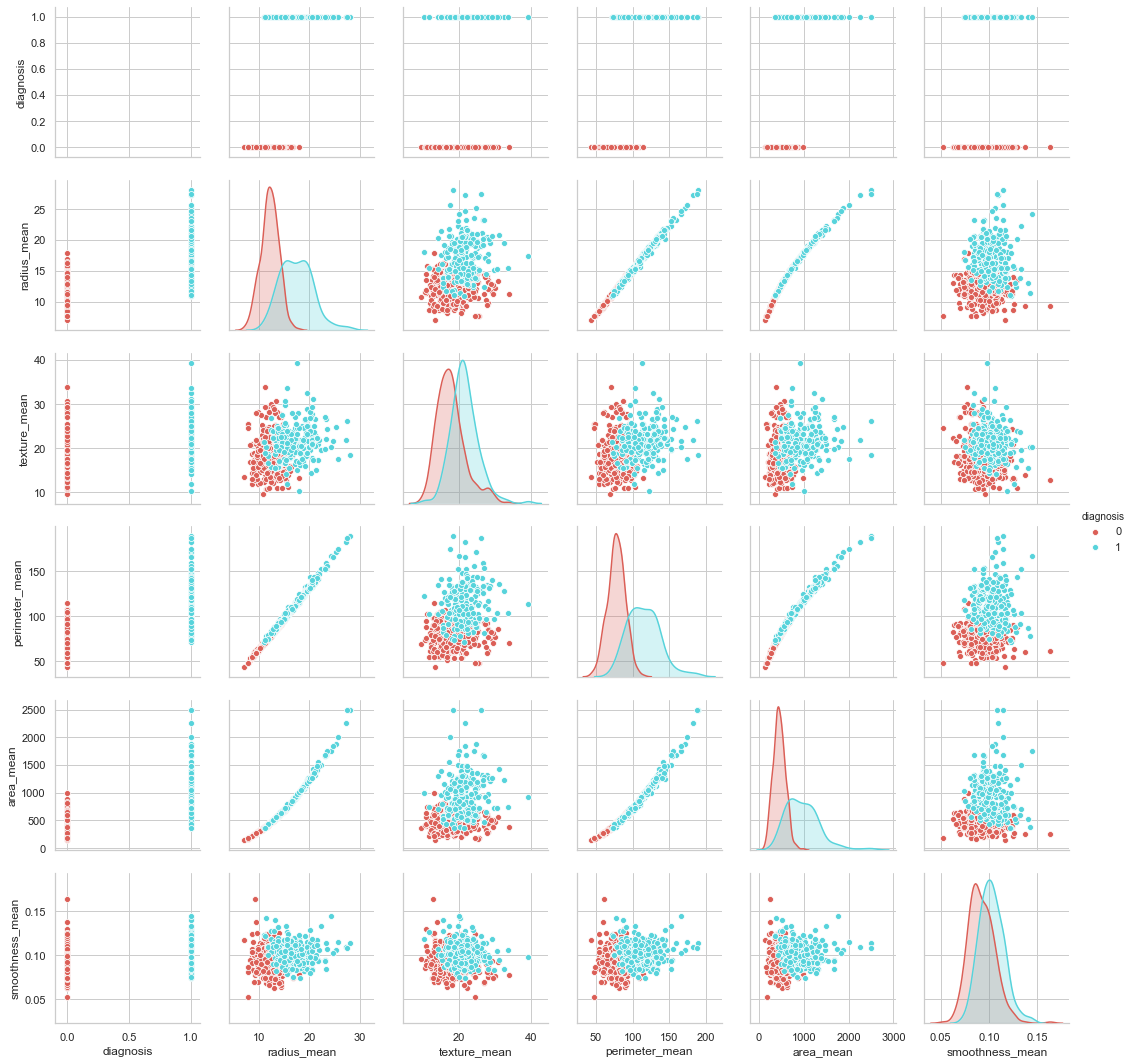

In [337]:
sns.set_style('whitegrid')
sns.pairplot(df.iloc[:, 0:6], hue = 'diagnosis', palette = 'hls')

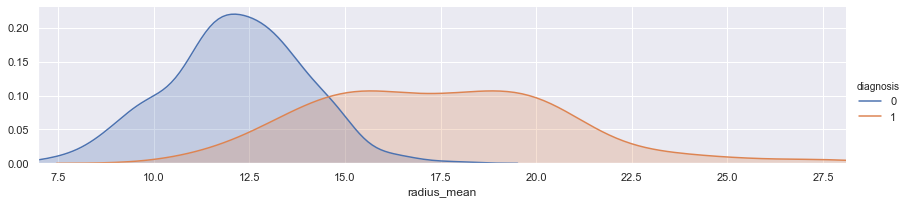

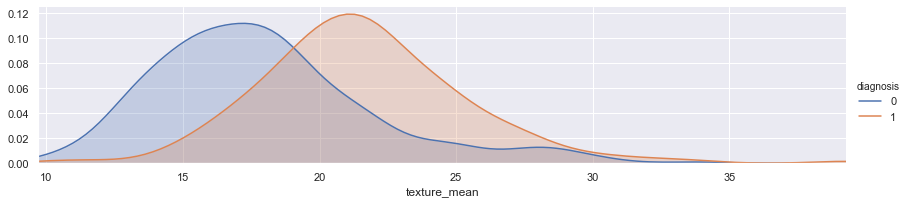

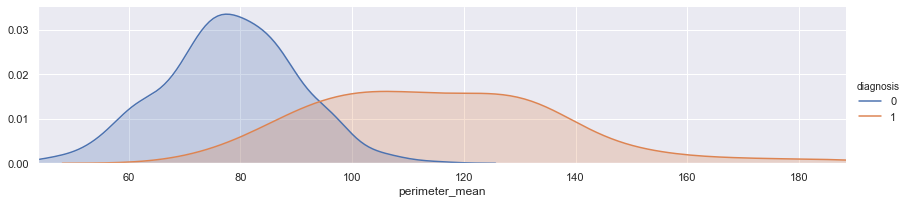

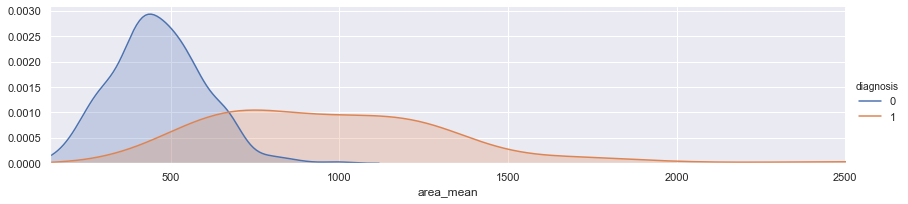

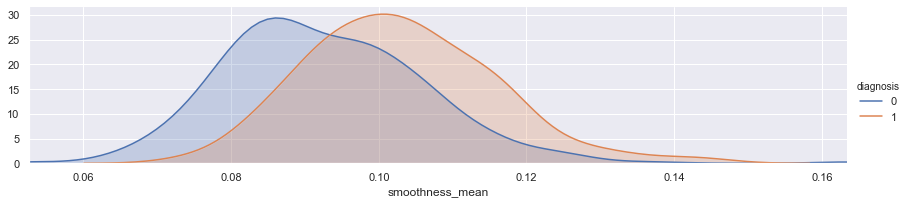

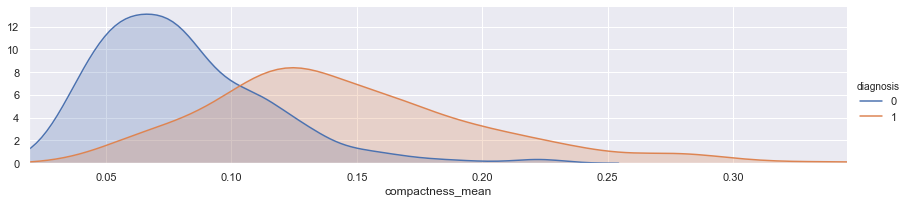

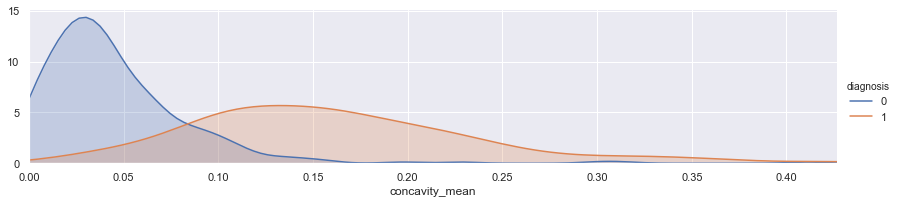

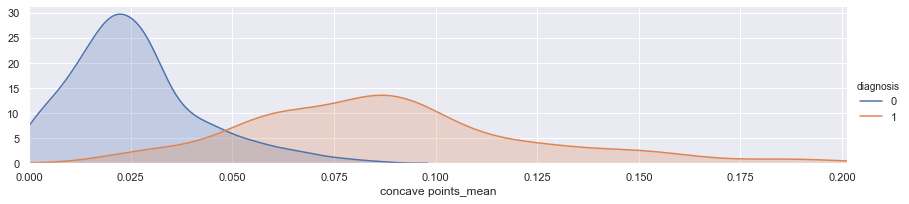

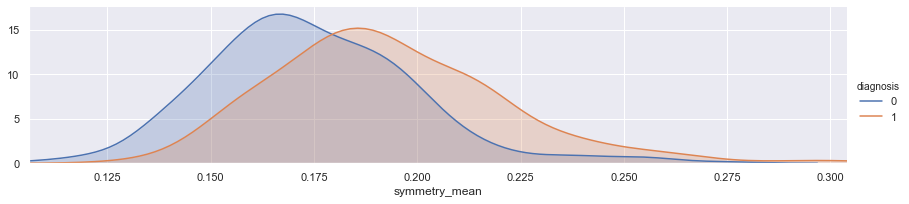

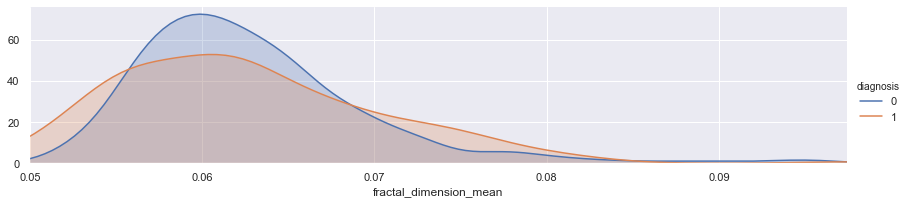

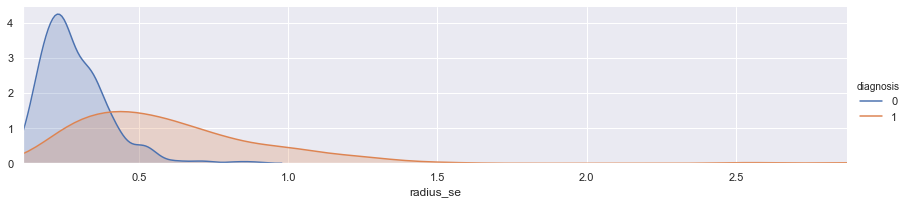

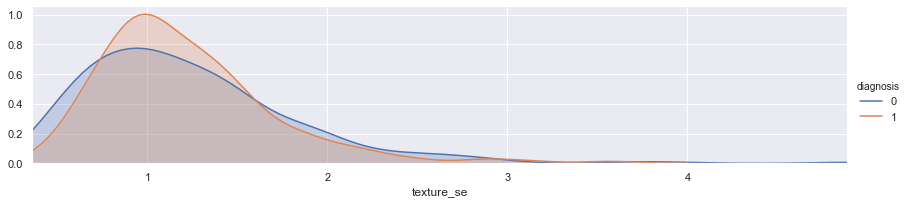

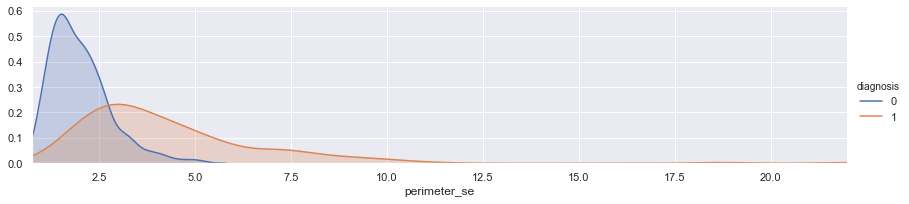

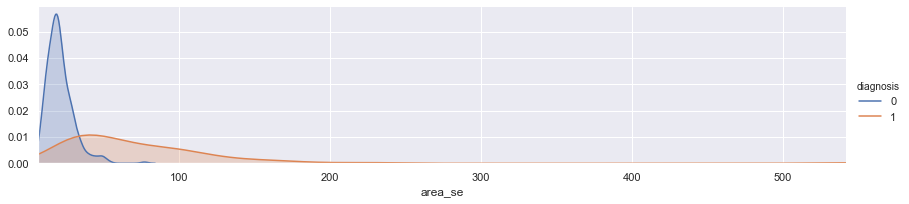

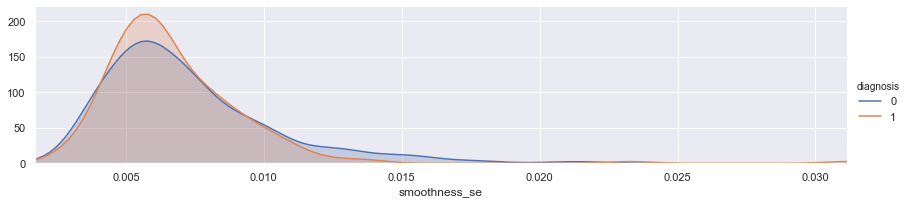

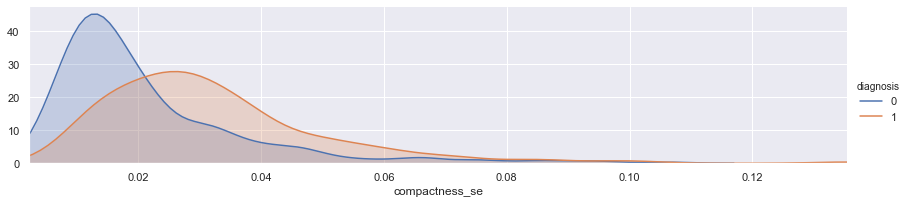

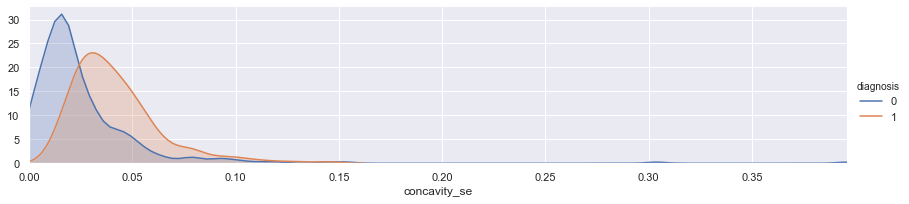

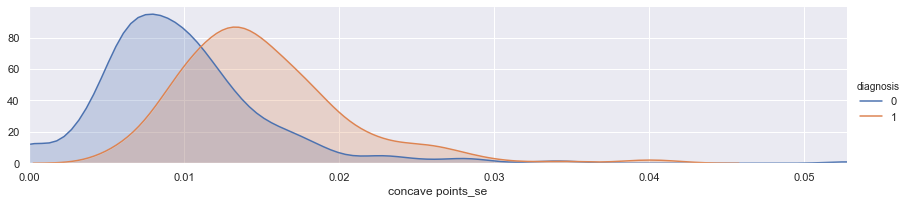

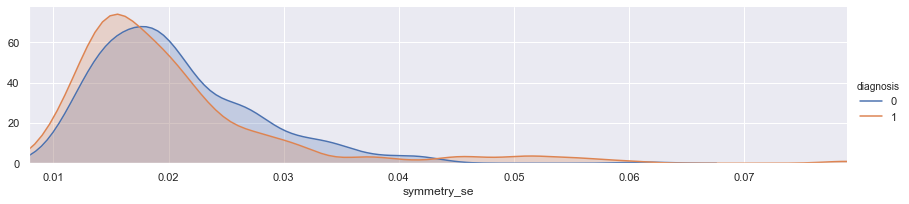

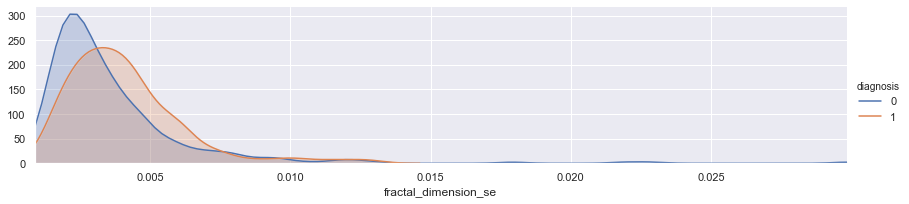

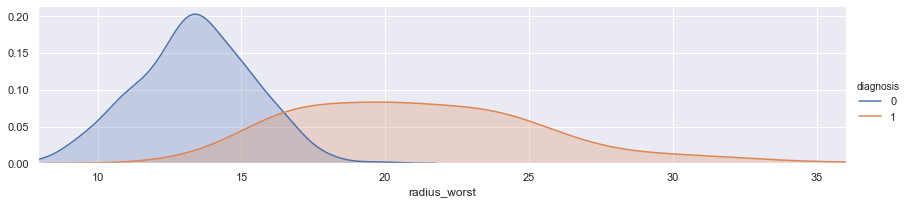

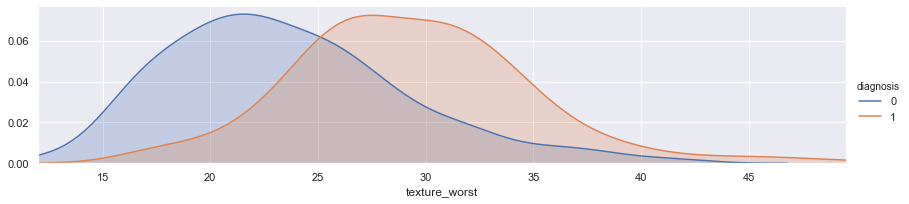

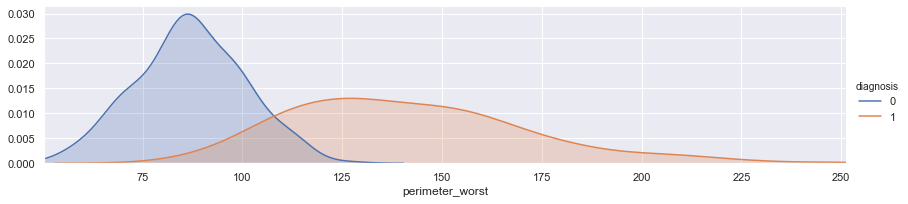

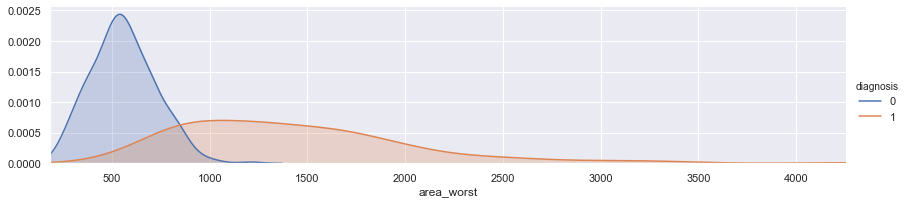

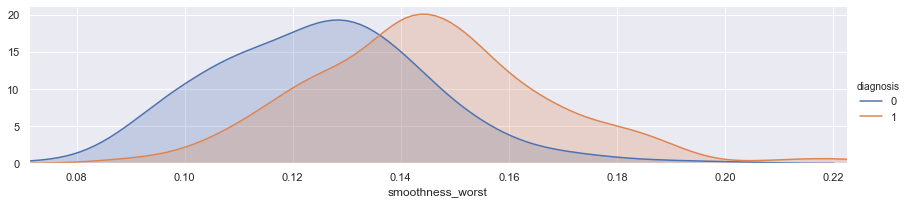

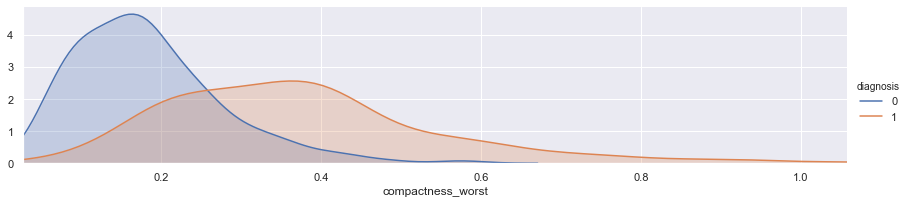

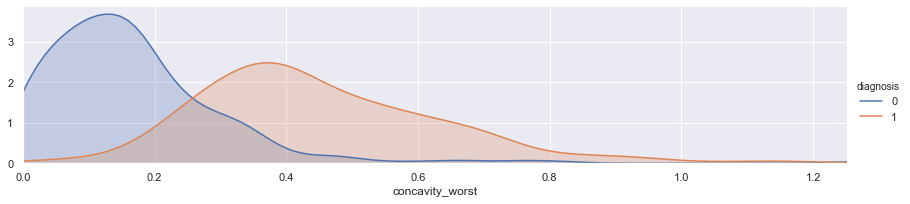

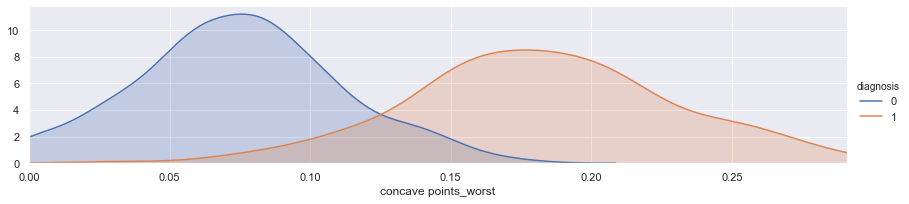

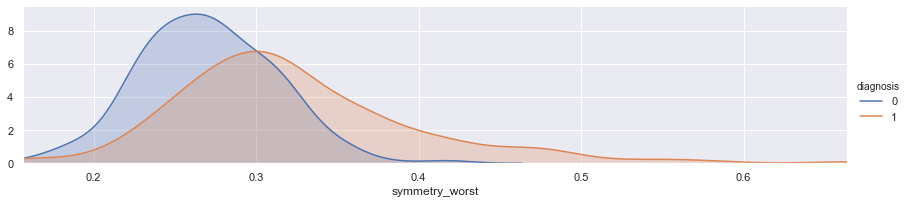

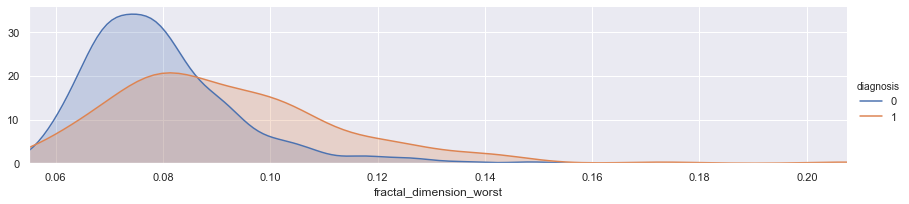

In [338]:
for feature in df.columns:
    if feature != 'diagnosis':
        sns.set(style="darkgrid")
        feat = sns.FacetGrid(df, hue = 'diagnosis', aspect = 4)
        feat.map(sns.kdeplot, feature, shade = True)
        feat.set(xlim = (df[feature].min(), df[feature].max()))
        feat.add_legend()
        plt.show()

In [339]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


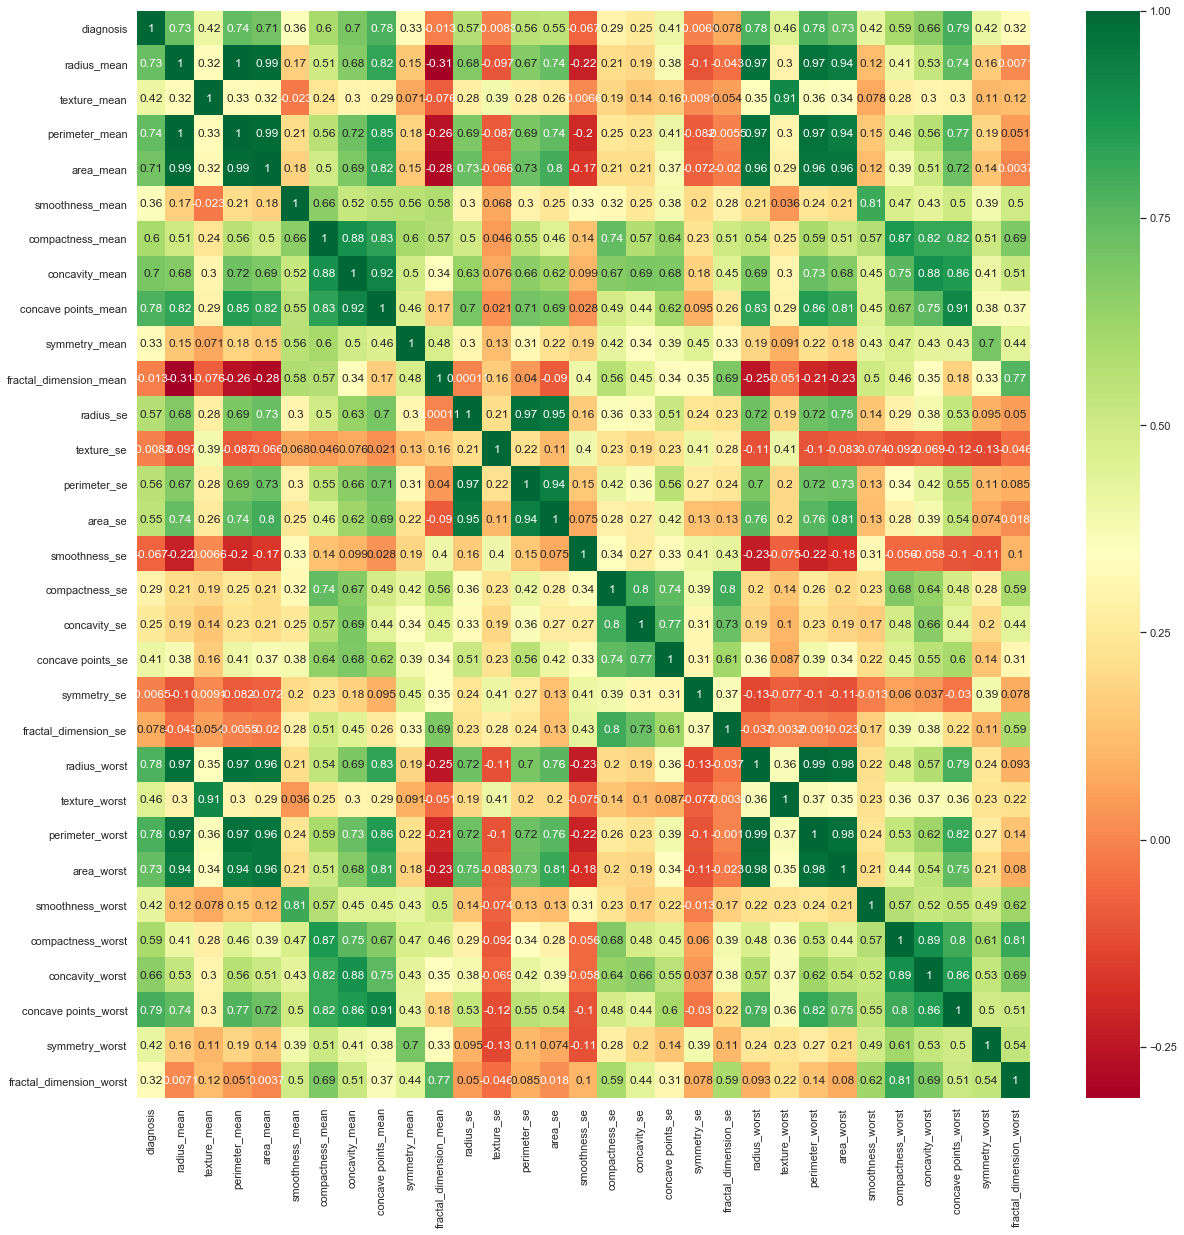

In [340]:
#plt.figure(figsize=(18,18))
#sns.heatmap(df.corr(),cmap='viridis',annot=True)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

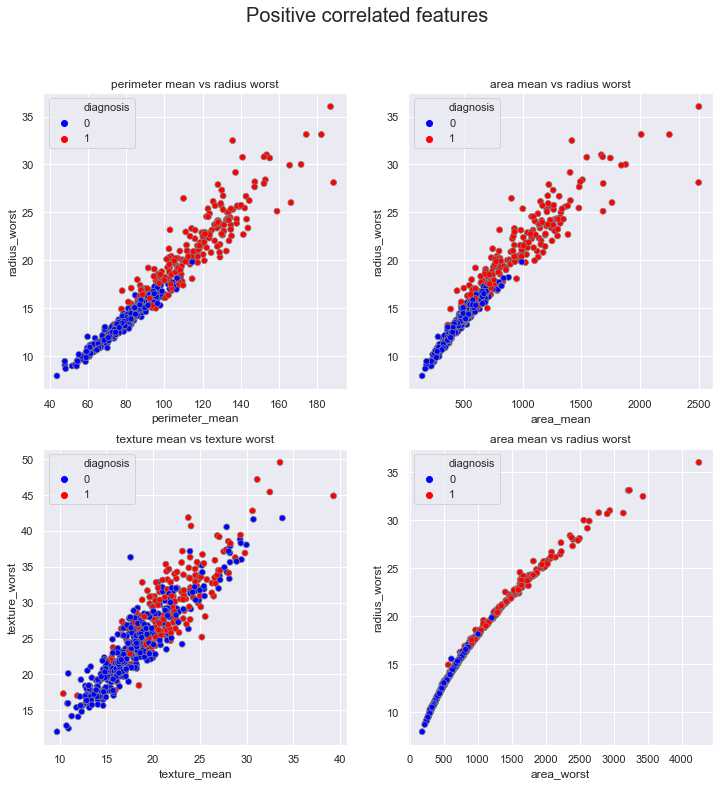

In [341]:
palette ={0 : 'blue', 1 : 'red'}
edgecolor = 'grey'
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')

plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')

plt.subplot(224)
ax4 = sns.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.show()

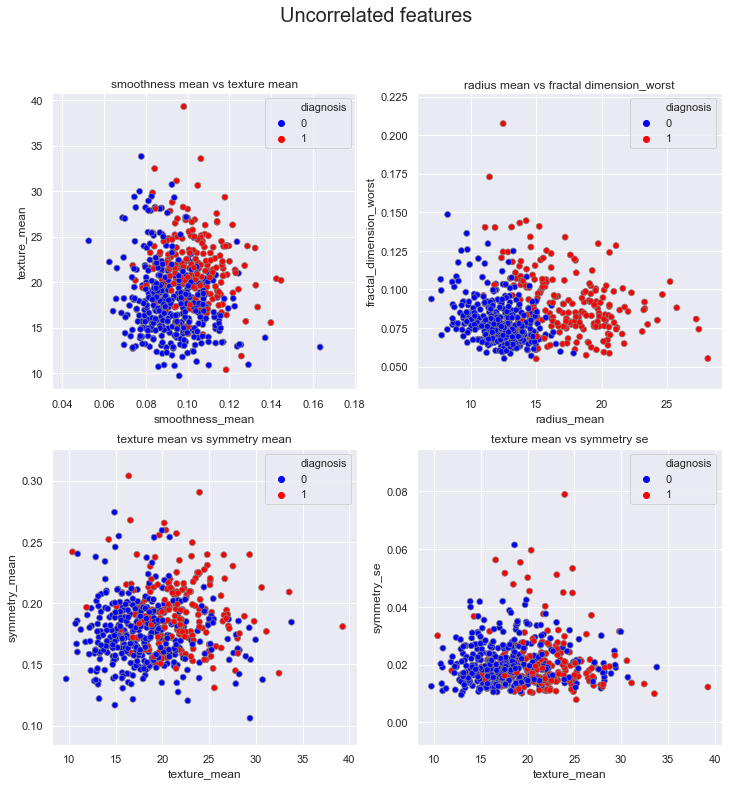

In [342]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['smoothness_mean'], y = df['texture_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')

plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')

plt.subplot(223)
ax3 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')

plt.subplot(224)
ax4 = sns.scatterplot(x = df['texture_mean'], y = df['symmetry_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.show()


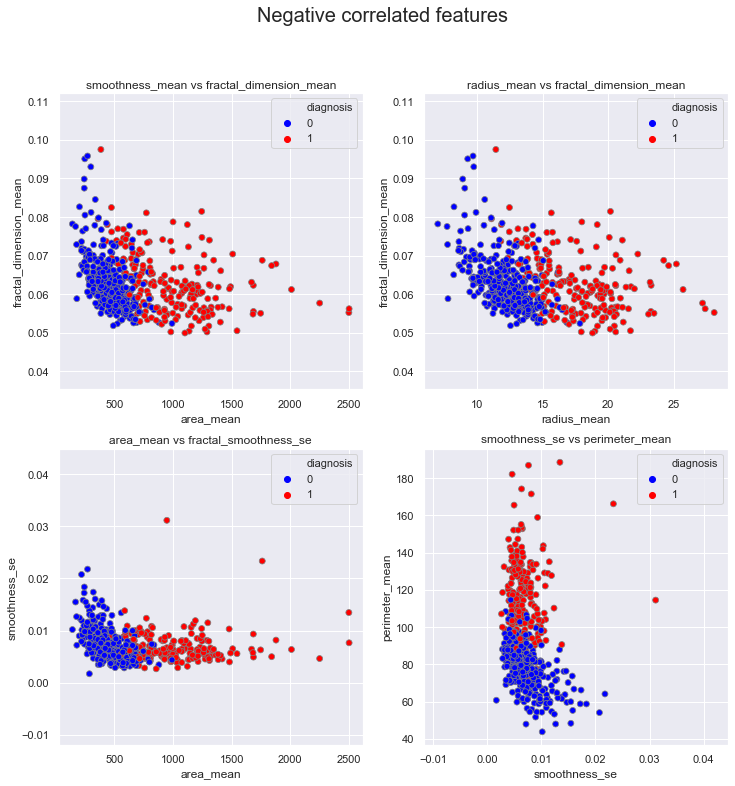

In [343]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['area_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness_mean vs fractal_dimension_mean')

plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs fractal_dimension_mean')

plt.subplot(223)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['smoothness_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area_mean vs fractal_smoothness_se')

plt.subplot(224)
ax2 = sns.scatterplot(x = df['smoothness_se'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness_se vs perimeter_mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.show()

In [344]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [345]:
X = df.iloc[:, 1:31]
y = df.iloc[:, 0]

In [346]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [347]:
best_features = SelectKBest(score_func=chi2, k=20)
fit = best_features.fit(X,y)
print(fit.get_support())

[ True  True  True  True False  True  True  True False False  True False
  True  True False  True  True False False False  True  True  True  True
 False  True  True  True  True False]


In [348]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features','Score']
feature_scores

,Features,Score
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


In [349]:
best_features_rank = feature_scores.nlargest(20,'Score')
best_features_rank

,Features,Score
23,area_worst,112598.431564
3,area_mean,53991.655924
13,area_se,8758.504705
22,perimeter_worst,3665.035416
2,perimeter_mean,2011.102864
20,radius_worst,491.689157
0,radius_mean,266.104917
12,perimeter_se,250.571896
21,texture_worst,174.449400
1,texture_mean,93.897508


In [350]:
#X_best_features = df.loc[:, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 
          # 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se',
          #'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concave points_worst',
           #'symmetry_worst',]]

In [351]:
best_features_rank.iloc[:, 0].values

array(['area_worst', 'area_mean', 'area_se', 'perimeter_worst',
       'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se',
       'texture_worst', 'texture_mean', 'concavity_worst', 'radius_se',
       'concavity_mean', 'compactness_worst', 'concave points_worst',
       'concave points_mean', 'compactness_mean', 'symmetry_worst',
       'concavity_se', 'compactness_se'], dtype=object)

In [352]:
X_best_features = X.loc[: ,['area_worst', 'area_mean', 'area_se', 'perimeter_worst',
       'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se',
       'texture_worst', 'texture_mean', 'concavity_worst', 'radius_se',
       'concavity_mean', 'compactness_worst', 'concave points_worst',
       'concave points_mean', 'compactness_mean', 'symmetry_worst',
       'concavity_se', 'compactness_se']]

In [353]:
X_best_features.shape

(569, 20)

In [354]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_best_features)

In [355]:
names = X_best_features.columns
X_df = pd.DataFrame(X_scaled, columns = names)
X_df.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean,concavity_worst,radius_se,concavity_mean,compactness_worst,concave points_worst,concave points_mean,compactness_mean,symmetry_worst,concavity_se,compactness_se
0,2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335,2.109526,2.489734,2.652874,2.616665,2.296076,2.532475,3.283515,2.750622,0.724026,1.316862
1,1.890489,1.908708,0.742402,1.535126,1.685955,1.805927,1.829821,0.263327,-0.369203,-0.353632,-0.146749,0.499255,-0.023846,-0.430444,1.087084,0.548144,-0.487072,-0.243890,-0.440780,-0.692926
2,1.456285,1.558884,1.181336,1.347475,1.566503,1.511870,1.579888,0.850928,-0.023974,0.456187,0.854974,1.228676,1.363478,1.082932,1.955000,2.037231,1.052926,1.152255,0.213076,0.814974
3,-0.550021,-0.764464,-0.288378,-0.249939,-0.592687,-0.281464,-0.768909,0.286593,0.133984,0.253732,1.989588,0.326373,1.915897,3.893397,2.175786,1.451707,3.402909,6.046041,0.819518,2.744280
4,1.220724,1.826229,1.190357,1.338539,1.776573,1.298575,1.750297,1.273189,-1.466770,-1.151816,0.613179,1.270543,1.371011,-0.313395,0.729259,1.428493,0.539340,-0.868353,0.828471,-0.048520


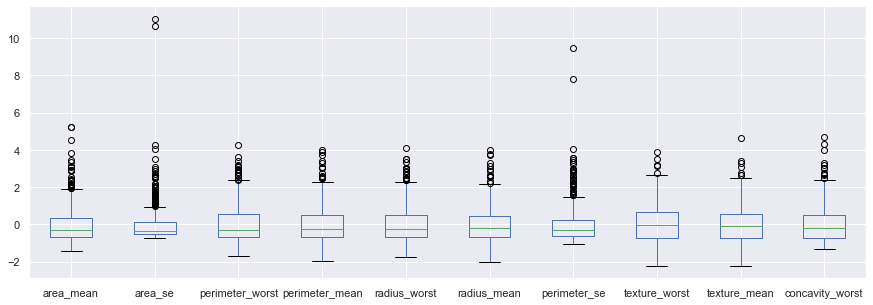

In [364]:
plt.figure(figsize = (15,5))
X_df.iloc[:, 1:11].boxplot()

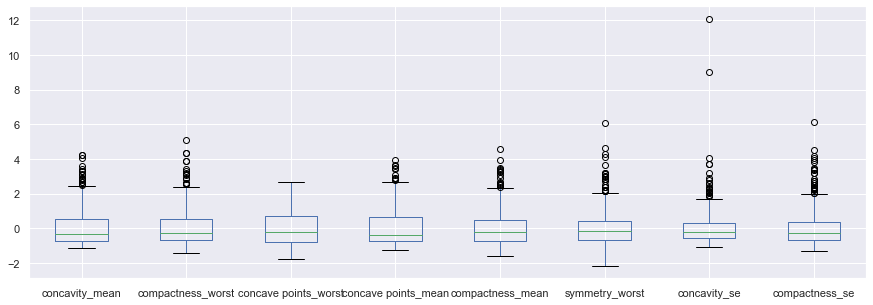

In [363]:
plt.figure(figsize = (15,5))
X_df.iloc[:, 12:21].boxplot()